# Editing a model in Amazon SageMaker 

In this lab you will learn to edit a pre-trained object recognition model to perform a binary classification to classify an object as either a Hotdog or Not Hotdog. This fun exercise is based on a popular sitcom and demonstrates the extensibility of AWS DeepLens. We will edit the model in Amazon SageMaker. Amazon SageMaker is an end to end machine learning platform to train and host your models to production. 

In this exercise, you will learn to:

1. Load your notebook into Amazon SageMaker notebook instance
2. Train your model in the notebook
3. Save your model artifacts into your S3 bucket
4. Import the model artifacts to DeepLens


## Step 1- Create a bucket in S3

1. Visit https://s3.console.aws.amazon.com/s3/home?region=us-east-1# to access Amazon S3 console
2. Make sure you are on US East (N.Virginia) region
3. Click on Create a bucket. 
4. Name the bucket- deeplens-sagemaker-your-full-name (Please note: It is important that is prefixed with deeplens-sagemaker prefix, else these services cannot access. Click Next
5. Give the bucket public read and write access. A new bucket will be created in the account.
6. After you create the bucket, create a folder in the bucket and name it test. 

## Step 2- Amazon SageMaker console

1. Visit https://console.aws.amazon.com/sagemaker/home?region=us-east-1#/dashboard to access Amazon SageMaker console

2. Make sure you are on US East (N. Virginia) region

3. Click on notebook instances

4. You will find a notebook instance pre-launched and running for you in the account. It is titled myWorkspace



![image.png](https://github.com/aws-samples/reinvent-2017-deeplens-workshop/blob/master/lab%20session%203/assets/1.png)

## Step 3- Open Notebook instance

1. Click on myWorkspace notebook instance and click on Open 

2. Jupyter notebook instance will open. Click sample notebook

3. Find the deeplens-hotdog-or-not-hotdog notebook

4. Click on the notebook to launch it.

## Step 4- Execute the notebook

1. Read through the notebook
2. Execute each cell by using the play button on the navigation bar or using shift+ enter or cmd + enter

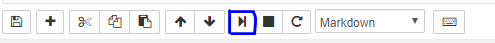


## Step 5- Provide S3 bucket name

1. In the last cell, you need to provide the name of the S3 bucket you created earlier

2. your s3 file path will be deeplens-sagemaker-your-full-name

3. Your prefix path for key variable will be key= 'folder-name/hotdog_or_not...' In our case, since the folder is named as test, it will be key= 'test/hotdog_or_not...'

4. After making the above changes, execute the cell.

5. The json and params file have been uploaded to your S3 bucket. It takes a couple of minutes for the json and params file to be created.

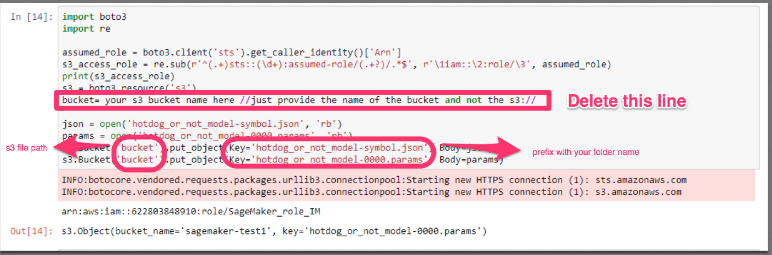

## Step 6- Import the artifacts into DeepLens

1. Json and Params file are referred to as model artifacts. The JSON file contains the architecture of the network and the params file consists of the corresponding weights for the architecture

2. Visit AWS DeepLens console (https://console.aws.amazon.com/deeplens/home?region=us-east-1#projects)

3. Navigate to Models section

4. Click on Import Model

5. Choose externally trained model


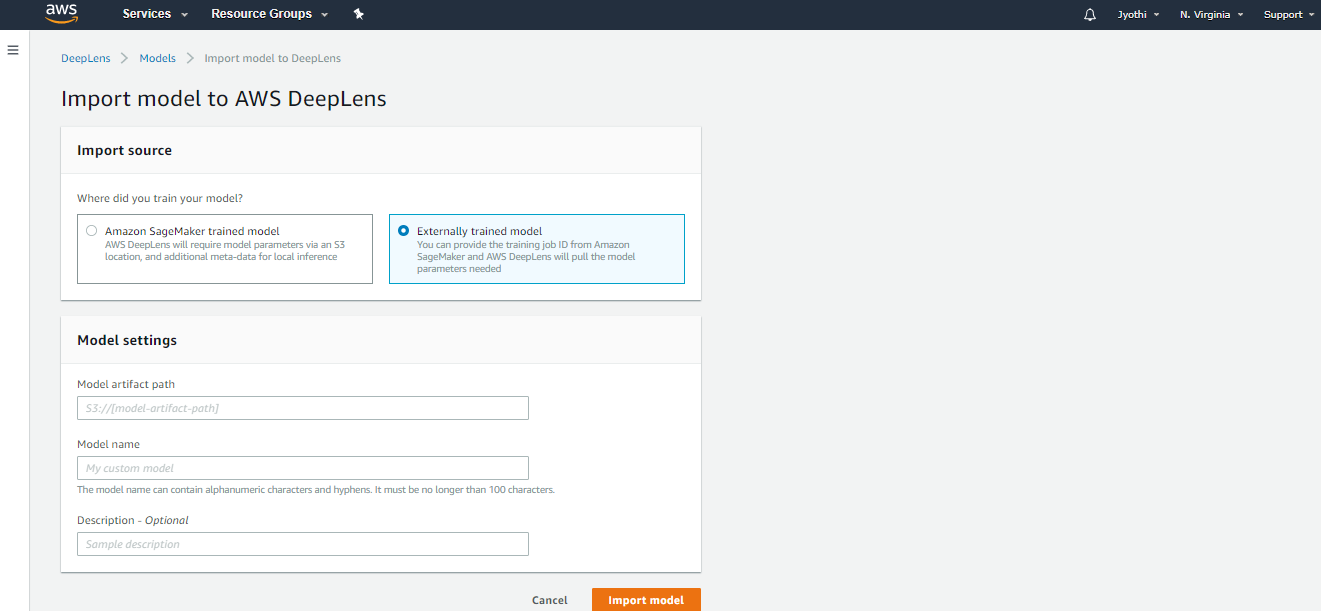

## Step 7- Provide S3 path

1. Provide the model artifact path. It will be s3://deeplens-sagemaker-your full name/test

2. Provide a name for the model: hotdog-your full name

3. Click on Import Model

4. Your model (hotdog- your full name) will appear in the list of models

Since these models are not yet optimized, they will run on the CPU and will be very slow. For the purpose of this exercise, we have provided the optimized version of the machine learning model and a lambda function that does inference on your AWS DeepLens. This optimized model runs on the on-board GPU to provide accurate and responsive inferences.

## Step 8- Create a lambda function

1. Navigate to lab 3 github link (https://github.com/aws-samples/reinvent-2017-deeplens-workshop/tree/master/lab%20session%203) or in S3 bucket here  (paste link here)
2. Find the zipfile titled deeplens-squeezenet.zip
3. Download the zip file
4. Navigate to Lambda console: https://console.aws.amazon.com/lambda/home?region=us-east-1#/functions
5. Make sure you are on US East-1- N.Virginia region
6. Click on Create function
7. Click Author from scratch
8. Name it deeplens-squeezenet (the model and function should be identical)
9. Choose an existing role
10. Choose the existing deeplens_lambda role
11. Click Create function

## Step 9- Configure your lambda function

1. In the Runtime, change it to python 2.7
2. In the handler box, change it to greengrassHelloWorld.function_handler
3. In the code entry type, upload a zip file. Upload the zip file that you just downloaded
4. Click Save
5. In Actions tab, click publish and provide your name_sagemaker as the description

## Step 10- Create a Project

1. Navigate to Projects in the AWS DeepLens console

2. Click on Create a new project

3. Click on Create a new blank project template

4. Give the project a name- your full name- hotdog- gpu

5. Click on add model and choose the deeplens-squeezenet model

6. Click on Add function and choose the deeplens-squeezenet function

7. Create project


## Step 11- Deploy project to AWS DeepLens

1. Choose the project you just created

2. Click deploy to device

3. Choose your device

4. Review and hit deploy




## Step 12- View the output

1. open the terminal. You can access the top left search icon on Ubuntu and type Terminal

2. copy paste the following command: mplater -demuxer lavf -lavfdopts format=mjpeg:probesize=32 /tmp/results.mjpeg

This optimized model will let you access the GPU for running inference. Show a hotdog to your AWS DeepLens and watch its prediction. 